In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud


In [38]:
df = pd.read_csv('TrendAnalysisData.csv')

In [39]:
df.shape

(31582, 9)

In [40]:
df.isnull().sum()

Brand                      0
Description                0
Image_URL                  0
Product_ID                 0
Discount_Price (in Rs.)    0
Original_Price (in Rs.)    0
Product_URL                0
Category_by_gender         0
Category                   0
dtype: int64

In [41]:
df.drop_duplicates(inplace=True)

In [42]:
df.shape

(31018, 9)

In [43]:
df.isnull().sum()

Brand                      0
Description                0
Image_URL                  0
Product_ID                 0
Discount_Price (in Rs.)    0
Original_Price (in Rs.)    0
Product_URL                0
Category_by_gender         0
Category                   0
dtype: int64

In [44]:
df['Brand'] = df['Brand'].str.title()
df['Description'] = df['Description'].str.title()
df['Category_by_gender'] = df['Category_by_gender'].str.title()
df['Category'] = df['Category'].str.title()


In [45]:
# Function to get sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['Sentiment'] = df['Description'].apply(get_sentiment)


In [46]:
print(df[df['Original_Price (in Rs.)'].apply(lambda x: not str(x).isdigit())])
print(df[df['Discount_Price (in Rs.)'].apply(lambda x: not str(x).isdigit())])


           Brand                                        Description  \
0      Performax  Typographic Print Track Pants With Insert Pockets   
1      Performax                       Low-Top Lace-Up Sports Shoes   
3      Performax       Camouflage Print Joggers With Insert Pockets   
10     Performax         Logo Print Track Pants With Insert Pockets   
11     Performax               Joggers With Zippered Insert Pockets   
...          ...                                                ...   
31577       Ajio                    Printed Top With Raglan Sleeves   
31578       Ajio                    Striped Cropped Pants With Belt   
31579       Ajio                      Striped City Shorts With Belt   
31580       Ajio                   Denim Jacket With Frayed Hemline   
31581       Ajio                     Checked Wrap-Around Mini Skirt   

                                               Image_URL    Product_ID  \
0      https://assets.ajio.com/medias/sys_master/root...  441136763008   

In [47]:
df['Original_Price (in Rs.)'] = df['Original_Price (in Rs.)'].str.replace(',', '')
df['Discount_Price (in Rs.)'] = df['Discount_Price (in Rs.)'].str.replace(',', '')

In [48]:
df['Original_Price (in Rs.)'] = pd.to_numeric(df['Original_Price (in Rs.)'], errors='coerce')
df['Discount_Price (in Rs.)'] = pd.to_numeric(df['Discount_Price (in Rs.)'], errors='coerce')
df.isnull().sum()

Brand                      0
Description                0
Image_URL                  0
Product_ID                 0
Discount_Price (in Rs.)    0
Original_Price (in Rs.)    0
Product_URL                0
Category_by_gender         0
Category                   0
Sentiment                  0
dtype: int64

In [49]:
# Create discount percentage
df['Discount_Percentage'] = ((df['Original_Price (in Rs.)'] - df['Discount_Price (in Rs.)']) / df['Original_Price (in Rs.)']) * 100

# Categorize image availability
df['Image_Availability'] = np.where(df['Image_URL'].notna(), 'Yes', 'No')


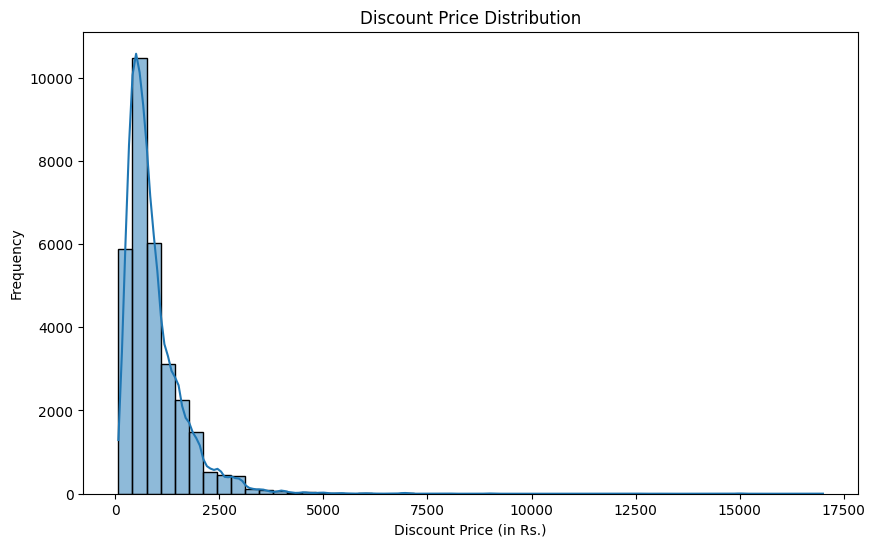

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Discount_Price (in Rs.)'], bins=50, kde=True)
plt.title('Discount Price Distribution')
plt.xlabel('Discount Price (in Rs.)')
plt.ylabel('Frequency')
plt.show()


C:\Users\ashit\AppData\Local\Temp\ipykernel_5528\1292165901.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='viridis')


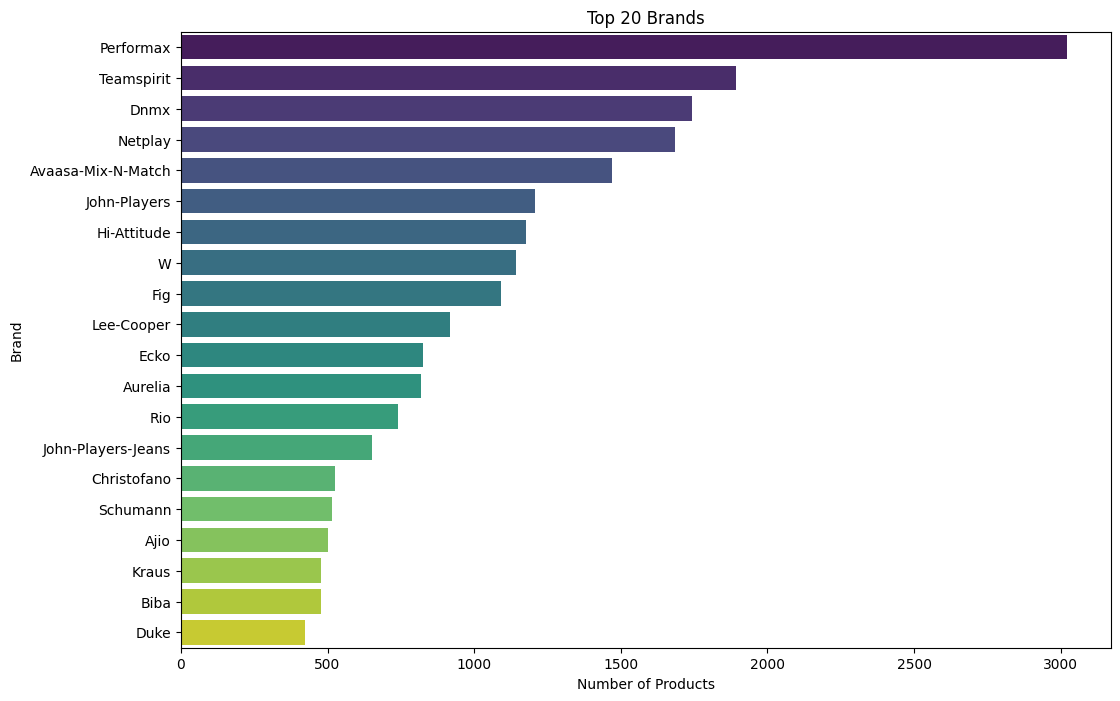

In [51]:
plt.figure(figsize=(12, 8))
brand_counts = df['Brand'].value_counts().head(20)
sns.barplot(x=brand_counts.values, y=brand_counts.index, palette='viridis')
plt.title('Top 20 Brands')
plt.xlabel('Number of Products')
plt.ylabel('Brand')
plt.show()


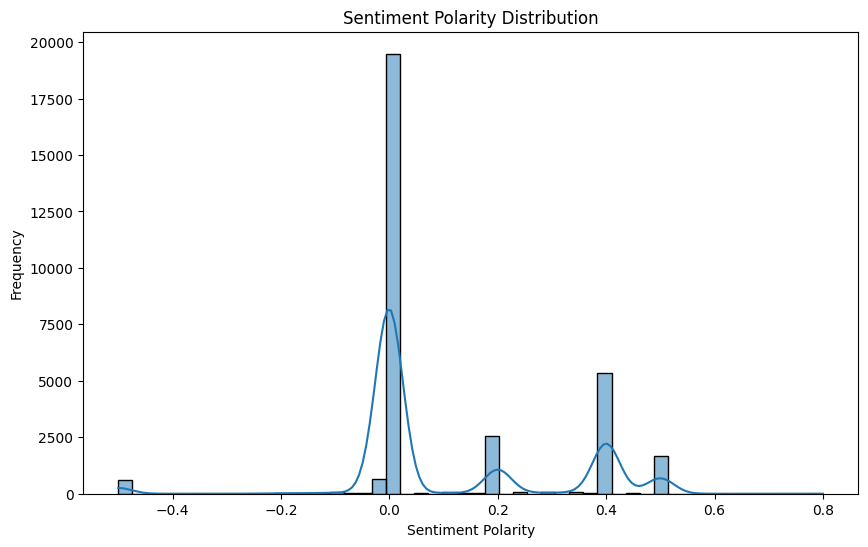

In [52]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sentiment'], bins=50, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()


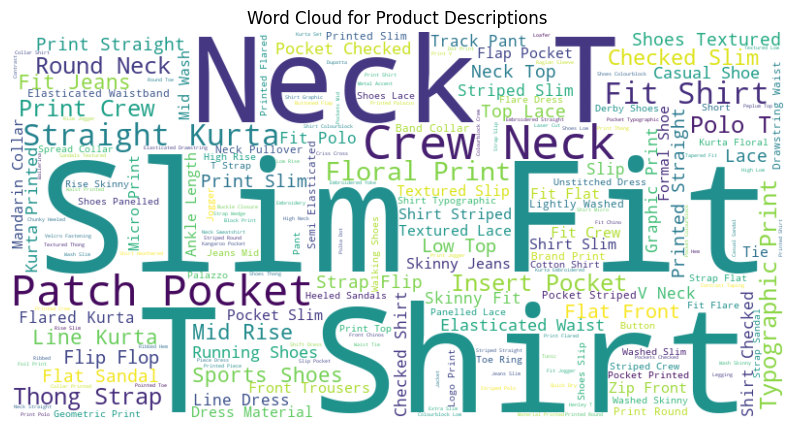

In [53]:
text = ' '.join(df['Description'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Product Descriptions')
plt.show()


In [55]:
df.to_csv('cleaneddataset.csv', index=False)